# Lineage analysis for Tables with Procedures (via Manta)

Process outline
- read .json file with lineage (suffix for json file indicates depth) - this is generated from another script
   - todo: extract json from api directly
- use pandas to normalize the json - so you can easily see/process each item returned
- count the unique ids returned (concatenate all source/targets
- generate a diagram, using graphviz `conda install python-graphviz`

In [1]:
import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df
import json
%matplotlib inline
pd.options.display.max_colwidth=100
import graphviz as gv

In [2]:
#load json object (todo:  call rest api direclty)
jsonFile="ghdb_account_lineage_files/ghdb_objectLineage_01.json"
svgFile="ghdb_Accounts_01"
with open(jsonFile) as f:
    d = json.load(f)
# count the number of items returned
print ('total items in lineage json: ', len(d['items']))

total items in lineage json:  124


In [3]:
# show the raw json - but what we really want is to create a recordset (dataframe) for each entry in 'items'
# commented to save space
#d

In [4]:
#lets put the data into a pandas df
#using items as the array to normalize - so we get 1 row per lineage item
items = json_normalize(d['items'])
# display the first 10 items
items.head(10)

,associationId,inEmbedded.businessTerms,inEmbedded.facts,inId,inResource,outEmbedded.businessTerms,outEmbedded.facts,outId,outResource,properties
0,core.DataSetDataFlow,[],[],SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AIMSAccountMaintB/<231,5>UPDATE",SQLMtintldb_ghdbScripts,[]
1,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_CreateNewRelForGuideline/<810,4>UPDATE",SQLMtintldb_ghdbScripts,[]
2,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/WPS_CompleteAccountSetup/<181,3>UPDATE",SQLMtintldb_ghdbScripts,[]
3,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AIMSAccountProductMixMaintA/<407,4>UPDATE",SQLMtintldb_ghdbScripts,[]
4,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/UpdateAcctsPMS/<51,1>UPDATE",SQLMtintldb_ghdbScripts,[]
5,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/IMAccountUpdate/<120,6>INSERT",SQLMtintldb_ghdbScripts,[]
6,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AccountBatchReconciliation/<574,1>UPDATE",SQLMtintldb_ghdbScripts,[]
7,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/IMAccountUpdate/<82,6>UPDATE",SQLMtintldb_ghdbScripts,[]
8,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/UpdateMissingGPTaxLots/<794,5>UPDATE",SQLMtintldb_ghdbScripts,[]
9,core.DataSetDataFlow,NaN,NaN,SQLMtintldb_ghdb://ghdb/dbo/Accounts,SQLMtintldb_ghdb,[],[],"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_AccountBatchReconciliation/<308,1>UPDATE",SQLMtintldb_ghdbScripts,[]


## count the unique items from each inId

In [5]:
print ("uniqud  inIds:" , len(items.inId.unique()))
print ("uniqud outIds:" , len(items.outId.unique()))
uniqueIds = pd.concat([items['inId'], items['outId']]).unique()
print ("unique    ids:", len(uniqueIds))

uniqud  inIds: 88
uniqud outIds: 38
unique    ids: 116


In [6]:
# convert the uniqueIds array to a dataframe - for easier processing 
dfIds=pd.DataFrame({'id':uniqueIds})
dfIds.head(10)

,id
0,SQLMtintldb_ghdb://ghdb/dbo/Accounts
1,"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/BuildAccountBalances/<99,4>INSERT"
2,"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/GH_UpdateCorporateActionWorkTable/<1318,1>INSERT"
3,"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/UpdateTaxLotsPMS_Incremental/<202,4>INSERT"
4,"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/RebuildPMSTaxLotsByAccountID/<545,5>INSERT"
5,"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/UpdateTaxLotsPMSTrans/<603,5>INSERT"
6,"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AGGR_ExpandAggregate/<181,11>INSERT"
7,"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/CancelCorrectUpdate/<1927,1>INSERT"
8,"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/UpdateTaxLotsADPcashPartial/<122,5>UPDATE"
9,"SQLMtintldb_ghdbScripts://ghdb/dbo/Procedures/AM_CreateRelationship/<202,8>INSERT"


In [7]:
#items

In [8]:
# print a list of links from upstream to downstream (for info/debugging)
#for index, row in items.iterrows():
#   print(row['outId'], ' --> ', row['inId']) 


In [9]:
g1 = gv.Digraph(format='svg', strict=True, engine="dot")
g1.graph_attr['rankdir'] = 'LR'
g1.node_attr.update(shape='box', color='blue', style='filled', fillcolor='grey')
g1.attr(overlap='false')
#g1.attr(strict='true')
#g1.node['shape']='box'
counter = 0
for index, row in items.iterrows():
    counter += 1
    isFromProc = 'Scripts://' in row['outId']
    isToProc = 'Scripts://' in row['inId']
    # display the procedure/trigger objects with different colour & title
    if isFromProc:
        fromObj = '/'.join(row['outId'].replace(',', '_').split('/')[5:-1])
    else:
        fromObj = '/'.join(row['outId'].replace(',', '_').split('/')[2:])
    if isToProc:
        toObj = '/'.join(row['inId'].replace(',', '_').split('/')[5:-1])
    else:
        toObj = '/'.join(row['inId'].replace(',', '_').split('/')[2:])
        
    if isFromProc:
        g1.node(fromObj, shape='box3d', fillcolor='lightgrey', color='red')
    else:
        g1.node(fromObj)
    #g1.node_attr()
    if isToProc:
        g1.node(toObj, shape='box3d', fillcolor='lightgrey', color='red')
    else:
        g1.node(toObj)
    g1.edge(fromObj, toObj)
    #if counter==20:
    #    break
    
g1.view(svgFile)
#print(g1.source) 
#from IPython.display import SVG
#SVG(filename='Digraph.gv.svg')

'ghdb_Accounts_01.svg'

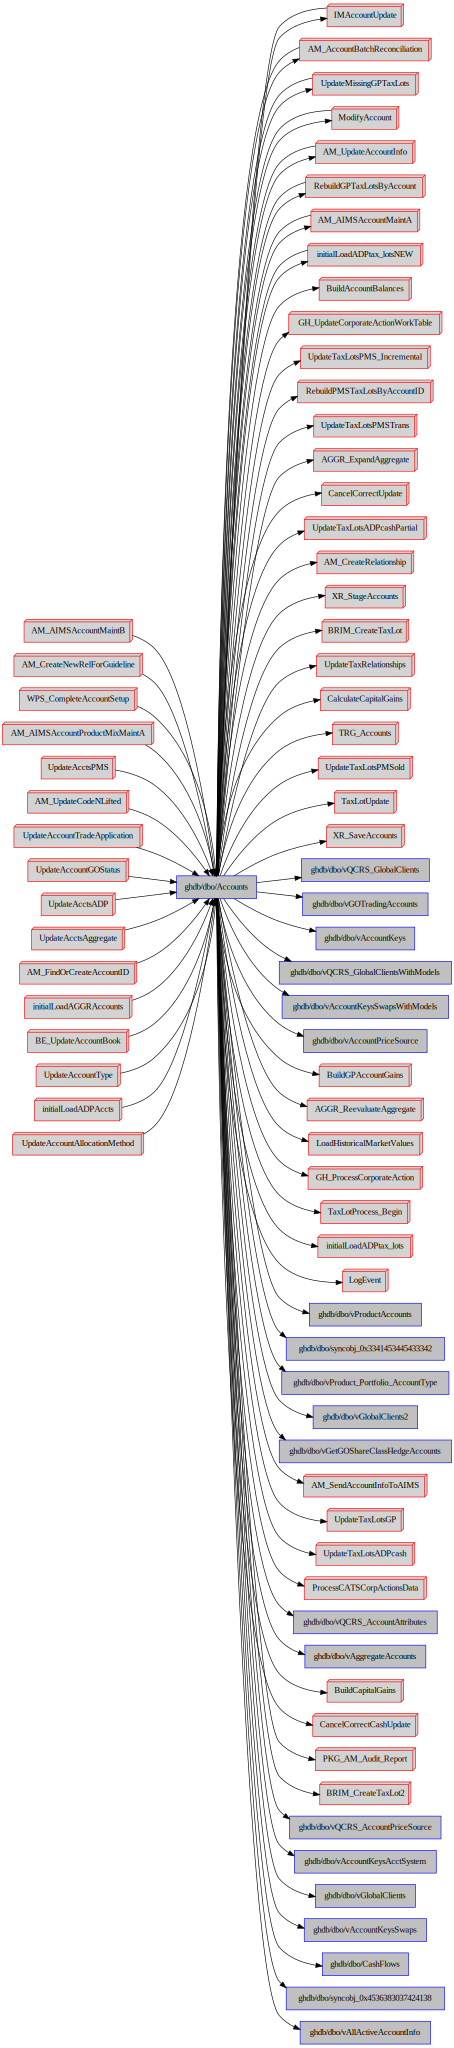

In [10]:
from IPython.display import SVG
SVG(filename=svgFile + ".svg")